In [ ]:
# requirements downloading and setup can refer to ultralytics official document https://github.com/ultralytics/ultralytics/tree/main/docs/en/guides
# detailed meaning of the parameters can refer to ultralytics official document https://github.com/ultralytics/ultralytics/blob/main/docs/en/modes/predict.md

In [1]:
from ultralytics import YOLO
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import utils
import os

In [17]:
model = YOLO("./runs/detect/circles/weights/best.pt") #./runs/detect/{your object name}/weights/best.pt

In [18]:
image_folder = './image/circles/' #./image/{your object name}
image_extensions = ['.jpg', '.jpeg', '.png']
image_files = []

for filename in os.listdir(image_folder):
    if any(filename.endswith(ext) for ext in image_extensions):
        image_files.append(image_folder+filename)

In [22]:
#Change this to the settings indicated under ./runs/detect/{your object name}/prediction settings.txt 
results = model(image_files,conf=0.8,iou=0.5,save=False)


0: 640x480 10 silver_screws, 1: 640x480 10 silver_screws, 2: 640x480 10 silver_screws, 3: 640x480 10 silver_screws, 4: 640x480 10 silver_screws, 5: 640x480 10 silver_screws, 6: 640x480 10 silver_screws, 7: 640x480 10 silver_screws, 8: 640x480 10 silver_screws, 9: 640x480 10 silver_screws, 10: 640x480 10 silver_screws, 11: 640x480 10 silver_screws, 12: 640x480 10 silver_screws, 13: 640x480 10 silver_screws, 14: 640x480 10 silver_screws, 15: 640x480 10 silver_screws, 16: 640x480 10 silver_screws, 17: 640x480 10 silver_screws, 18: 640x480 10 silver_screws, 19: 640x480 10 silver_screws, 20: 640x480 10 silver_screws, 21: 640x480 10 silver_screws, 22: 640x480 10 silver_screws, 23: 640x480 10 silver_screws, 24: 640x480 9 silver_screws, 25: 640x480 10 silver_screws, 26: 640x480 10 silver_screws, 27: 640x480 10 silver_screws, 28: 640x480 6 silver_screws, 29: 640x480 6 silver_screws, 30: 640x480 6 silver_screws, 31: 640x480 6 silver_screws, 32: 640x480 6 silver_screws, 33: 640x480 6 silver_scre

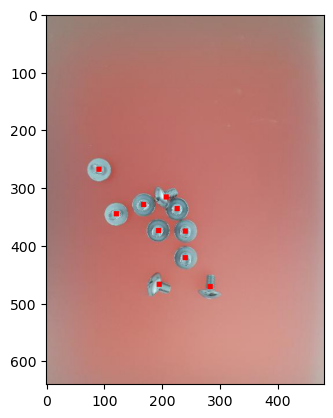

In [23]:
for index,result in enumerate(results):
    cordinations = result.boxes.xyxy
    classes = result.boxes.cls
    img_path = image_files[index]
    img_name = f'circles_{index}'
    utils.picture_dotting(img_path,img_name,cordinations,classes)

In [10]:
print(results)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Screw'}
orig_img: array([[[182, 147, 179],
        [182, 147, 179],
        [182, 147, 179],
        ...,
        [159, 115, 148],
        [158, 114, 147],
        [157, 113, 146]],

       [[182, 147, 179],
        [182, 147, 179],
        [182, 147, 179],
        ...,
        [160, 116, 149],
        [158, 114, 147],
        [157, 113, 146]],

       [[182, 147, 179],
        [182, 147, 179],
        [182, 147, 179],
        ...,
        [160, 116, 149],
        [159, 115, 148],
        [158, 114, 147]],

       ...,

       [[186, 157, 185],
        [185, 156, 184],
        [183, 154, 182],
        ...,
        [149, 117, 141],
        [149, 117, 141],
        [148, 118, 142]],

       [[186, 157, 185],
        [186, 157, 185],
        [185, 156, 184],
        ...,
        [150, 118, 142],
        [151, 119, 143],
        [150, 120, 144]

In [48]:
up = nn.UpsamplingBilinear2d(scale_factor=4)
imgup = np.transpose(img,(2,0,1))
imgup = torch.from_numpy(imgup).view(1,imgup.shape[0],imgup.shape[1],imgup.shape[2])
imgup.size()
print(imgup)
print(torch.from_numpy(img))

tensor([[[[214, 214, 213,  ..., 175, 172, 169],
          [213, 213, 213,  ..., 175, 173, 171],
          [212, 212, 211,  ..., 176, 175, 174],
          ...,
          [217, 217, 218,  ..., 195, 196, 190],
          [219, 219, 218,  ..., 196, 194, 184],
          [221, 221, 219,  ..., 194, 199, 197]],

         [[221, 221, 220,  ..., 189, 186, 183],
          [220, 220, 220,  ..., 189, 187, 185],
          [219, 219, 218,  ..., 190, 189, 188],
          ...,
          [222, 222, 223,  ..., 198, 200, 194],
          [224, 224, 223,  ..., 199, 198, 188],
          [226, 226, 224,  ..., 197, 203, 200]],

         [[229, 229, 228,  ..., 198, 195, 192],
          [228, 228, 228,  ..., 198, 196, 194],
          [227, 227, 226,  ..., 199, 198, 197],
          ...,
          [226, 226, 227,  ..., 213, 212, 203],
          [228, 228, 227,  ..., 214, 210, 197],
          [230, 230, 228,  ..., 212, 215, 209]]]], dtype=torch.uint8)
tensor([[[214, 221, 229],
         [214, 221, 229],
         [213

In [49]:
imgup = up(imgup)
imgup = imgup[0].numpy()
imgup = np.transpose(imgup,(1,2,0))
imgup = np.ascontiguousarray(imgup)

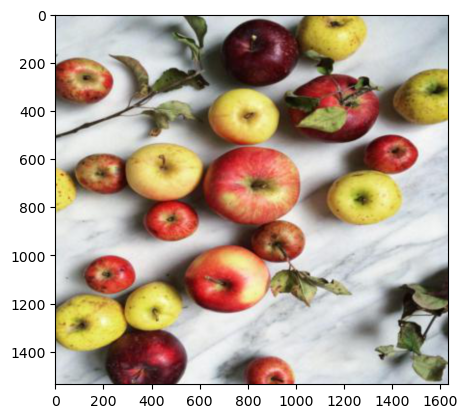

In [50]:
plt.imshow(imgup)

In [51]:
imgupBGR = imgup[:,:,::-1]

In [52]:
print(img.shape)
print(imgupBGR.shape)

(384, 408, 3)
(1536, 1632, 3)


In [53]:
imgupBGRsilce1 = imgupBGR[:img.shape[0]*2,:img.shape[1]*2,:]
imgupBGRsilce2 = imgupBGR[img.shape[0]*2:,:img.shape[1]*2,:]
imgupBGRsilce3 = imgupBGR[:img.shape[0]*2,img.shape[1]*2:,:]
imgupBGRsilce4 = imgupBGR[img.shape[0]*2:,img.shape[1]*2:,:]


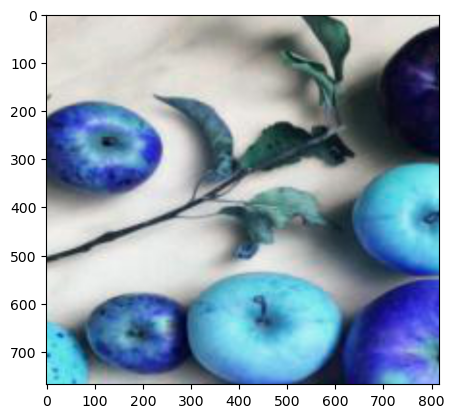

In [54]:
plt.imshow(imgupBGRsilce1)

In [55]:
imgBGR = img[:,:,::-1]

In [56]:
results = model([imgBGR,imgupBGR,imgupBGRsilce1,imgupBGRsilce2,imgupBGRsilce3,imgupBGRsilce4],conf=0.10,iou=0.3,save=True)


0: 640x640 20 apples, 1: 640x640 20 apples, 2: 640x640 6 apples, 3: 640x640 7 apples, 4: 640x640 8 apples, 5: 640x640 4 apples, 485.4ms
Speed: 9.8ms preprocess, 80.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict6


In [87]:
print(results)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant'

In [72]:
print(results[0].orig_img)

[[[ 76  93  96]
  [114 133 136]
  [119 140 142]
  ...
  [ 95 111 194]
  [106 122 205]
  [105 120 206]]

 [[ 31  51  62]
  [ 65  87  98]
  [ 85 110 120]
  ...
  [ 94 110 193]
  [ 91 107 190]
  [ 91 106 192]]

 [[ 16  42  66]
  [ 37  63  87]
  [ 64  95 118]
  ...
  [ 94 108 191]
  [107 121 204]
  [108 122 205]]

 ...

 [[ 60  66 163]
  [ 62  68 165]
  [ 60  63 161]
  ...
  [ 41  65 101]
  [ 32  54  90]
  [ 25  47  83]]

 [[ 55  60 159]
  [ 58  63 162]
  [ 57  59 159]
  ...
  [ 52  76 112]
  [ 52  74 110]
  [ 44  66 102]]

 [[ 50  55 154]
  [ 56  61 160]
  [ 57  62 161]
  ...
  [ 53  77 113]
  [ 58  80 116]
  [ 53  73 108]]]


In [73]:
print(img)

[[[ 96  93  76]
  [136 133 114]
  [142 140 119]
  ...
  [194 111  95]
  [205 122 106]
  [206 120 105]]

 [[ 62  51  31]
  [ 98  87  65]
  [120 110  85]
  ...
  [193 110  94]
  [190 107  91]
  [192 106  91]]

 [[ 66  42  16]
  [ 87  63  37]
  [118  95  64]
  ...
  [191 108  94]
  [204 121 107]
  [205 122 108]]

 ...

 [[163  66  60]
  [165  68  62]
  [161  63  60]
  ...
  [101  65  41]
  [ 90  54  32]
  [ 83  47  25]]

 [[159  60  55]
  [162  63  58]
  [159  59  57]
  ...
  [112  76  52]
  [110  74  52]
  [102  66  44]]

 [[154  55  50]
  [160  61  56]
  [161  62  57]
  ...
  [113  77  53]
  [116  80  58]
  [108  73  53]]]


In [38]:
print(results[0].boxes.xyxy)

tensor([[1.7062e+02, 9.5476e+01, 3.0510e+02, 3.8359e+02],
        [2.2347e+02, 8.9002e+01, 3.0138e+02, 1.5485e+02],
        [3.0040e-01, 1.2949e+02, 2.0482e+02, 3.1196e+02],
        [1.4173e+00, 2.7284e+02, 3.4292e+02, 3.8345e+02]], device='cuda:0')
